## Simple Linear Classification Model: Input Layer and Activation (Output) Layer

1. Load Breast Cancer Data
2. Learn the data
3. Split into train and test
4. Normalize Data
5. Build the model
6. Train the model
7. Plot loss and accuracy

In [18]:
import tensorflow as tf 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils._bunch.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape 
# samples, features

(569, 30)

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
# Split data sets
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [12]:
# Normalize data
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [13]:
# Create and train model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Metal device set to: Apple M1 Pro
Epoch 1/100


2022-09-08 19:42:29.258183: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-08 19:42:29.258676: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-08 19:42:29.355637: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


12/12 [==============================] - ETA: 0s - loss: 0.5422 - accuracy: 0.7664

2022-09-08 19:42:29.587083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 19ms/step - loss: 0.5422 - accuracy: 0.7664 - val_loss: 0.4245 - val_accuracy: 0.7926
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5015 - accuracy: 0.7848 - val_loss: 0.3923 - val_accuracy: 0.8351
Epoch 3/100
 1/12 [=>............................] - ETA: 0s - loss: 0.4454 - accuracy: 0.8125

2022-09-08 19:42:29.846181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 6ms/step - loss: 0.4652 - accuracy: 0.8084 - val_loss: 0.3644 - val_accuracy: 0.8457
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4333 - accuracy: 0.8215 - val_loss: 0.3407 - val_accuracy: 0.8617
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4057 - accuracy: 0.8320 - val_loss: 0.3202 - val_accuracy: 0.8830
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3807 - accuracy: 0.8530 - val_loss: 0.3025 - val_accuracy: 0.8936
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3593 - accuracy: 0.8635 - val_loss: 0.2870 - val_accuracy: 0.9096
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3400 - accuracy: 0.8661 - val_loss: 0.2730 - val_accuracy: 0.9202
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3217 - accuracy: 0.8714 - val_loss: 0.2610 - val_accuracy: 0.9255
Epoch 10/100
12/12 [=====

Epoch 61/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1049 - accuracy: 0.9738 - val_loss: 0.1134 - val_accuracy: 0.9894
Epoch 62/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1039 - accuracy: 0.9738 - val_loss: 0.1127 - val_accuracy: 0.9894
Epoch 63/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1030 - accuracy: 0.9738 - val_loss: 0.1121 - val_accuracy: 0.9894
Epoch 64/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1021 - accuracy: 0.9764 - val_loss: 0.1115 - val_accuracy: 0.9894
Epoch 65/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1012 - accuracy: 0.9764 - val_loss: 0.1110 - val_accuracy: 0.9894
Epoch 66/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1004 - accuracy: 0.9764 - val_loss: 0.1104 - val_accuracy: 0.9894
Epoch 67/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0996 - accuracy: 0.9764 - val_loss: 0.1099 - val_accuracy: 0.9894
Epoch 

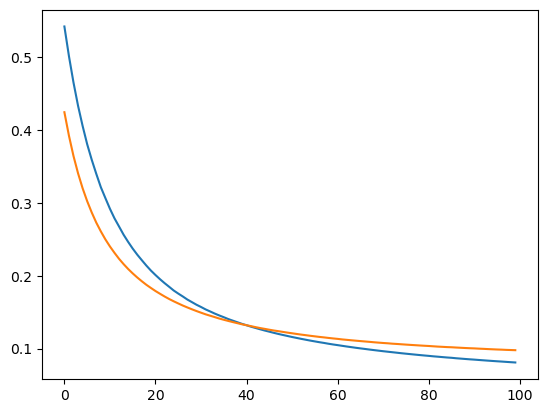

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

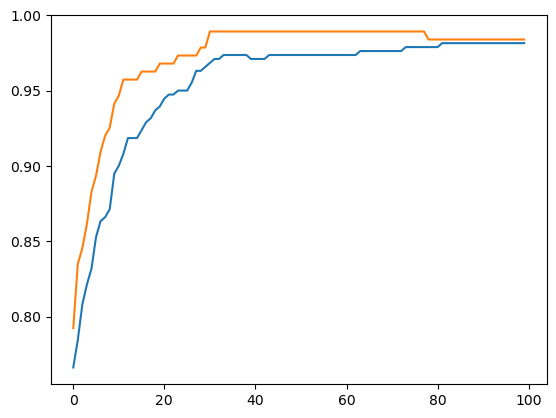

In [15]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')

## Part 2: Making Prections

In [22]:
p = model.predict(X_test)
p

6/6 [==============================] - 0s 3ms/step


array([[9.95793939e-01],
       [9.99819100e-01],
       [9.98944104e-01],
       [2.92801321e-01],
       [1.96621870e-03],
       [9.99844015e-01],
       [9.98453975e-01],
       [1.36109665e-01],
       [9.81463850e-01],
       [3.91339362e-02],
       [4.36777592e-01],
       [8.65148365e-01],
       [9.94338095e-01],
       [2.11722806e-01],
       [9.97908354e-01],
       [9.99825060e-01],
       [8.91638696e-01],
       [7.63623137e-03],
       [8.83544505e-01],
       [9.94065702e-01],
       [9.99379933e-01],
       [1.35327828e-05],
       [3.11688222e-02],
       [1.24756762e-05],
       [9.69337642e-01],
       [2.69080326e-02],
       [9.71836507e-01],
       [9.99649763e-01],
       [8.34753215e-01],
       [9.86713529e-01],
       [9.25431311e-01],
       [9.92308617e-01],
       [9.96070623e-01],
       [3.18816975e-02],
       [1.22900613e-01],
       [9.72745419e-01],
       [9.60494995e-01],
       [1.95176781e-08],
       [1.37656898e-04],
       [8.19339448e-07],


In [25]:
# Round to get actual prediction
# Need to flatten array to be same shape as input
p = np.round(p).flatten()
p

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1.], dtype=float32)

In [26]:
print("Manually calculated accuracy: ", np.mean(p == Y_test))
print("TF accuracy: ", model.evaluate(X_test, Y_test))

Manually calculated accuracy:  0.9840425531914894
6/6 [==============================] - 0s 5ms/step - loss: 0.0979 - accuracy: 0.9840
TF accuracy:  [0.09791740775108337, 0.9840425848960876]


## Part 3: Saving and Loading Model

In [28]:
model.save('linearClassifier.h5')

In [30]:
model = tf.keras.models.load_model('linearClassifier.h5')
print(model.layers)
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 8ms/step - loss: 0.0979 - accuracy: 0.9840


2022-09-08 19:54:24.758162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.09791740775108337, 0.9840425848960876]